In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [5]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']


In [7]:
import numpy as np

In [8]:
x=np.array(x)
y=np.array(y).reshape(-1,1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.3,random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit only on training data
x_train = scaler.fit_transform(x_train)

# Transform test data using same parameters
x_test = scaler.transform(x_test)

In [13]:
from sklearn.linear_model import Lasso


In [15]:
from sklearn.linear_model import LassoCV
# Try multiple alpha values
alphas = np.logspace(-3, 3,7)
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(x_train, y_train)
print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
best_ridge = Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train, y_train)#Gives relation blw them/equation

y_pred = best_ridge.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
#MSE
mse=mean_squared_error(y_test,y_pred)

#RMSE
rmse = np.sqrt(mse)

#R2 Score
r2=r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(r2)


21.531346225526637
4.6401881670387715
0.7110394345928663


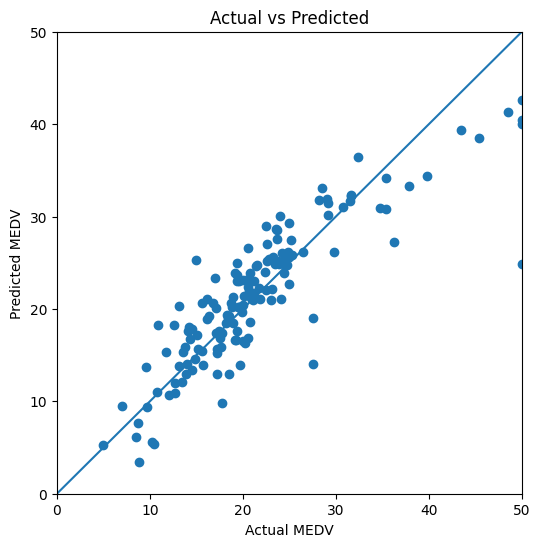

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
#plot prediction line
max_val=max(y_test.max(),y_pred.max())
plt.plot([0,max_val],[0,max_val], )
#start axes from 0
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted(Lasso Regression)')
plt.show()

In [35]:
best_ridge = Lasso(alpha=lasso_cv.alpha_)
best_ridge.fit(x_train, y_train)#Gives relation blw them/equation

y_train_pred = best_ridge.predict(x_train)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_train,y_train_pred)
print("mean square error:",mse)
rmse=np.sqrt(mse)
print("root mean square error:",rmse)
r2=r2_score(y_train,y_train_pred)
print("r-squared value:",r2)


mean square error: 22.545862403248226
root mean square error: 4.748248351049914
r-squared value: 0.7434954195159733


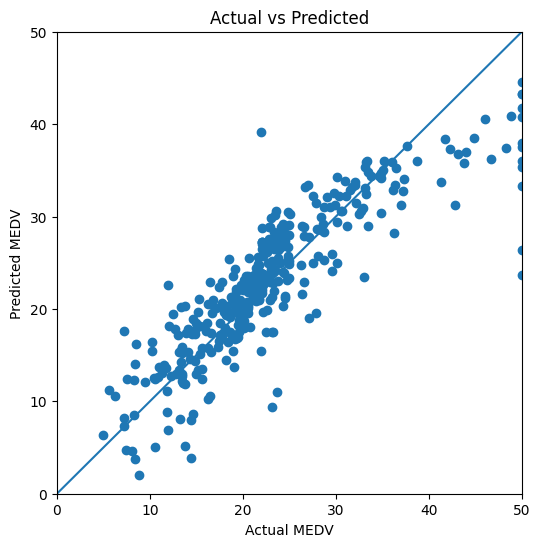

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_train,y_pred)
#plot prediction line
max_val=max(y_test.max(),y_train_pred.max())
plt.plot([0,max_val],[0,max_val], )
#start axes from 0
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted')
plt.show()